In [7]:
import torch as t
from torchvision import transforms as ts
from PIL import Image
from resnet import resnet50
from deepdream import dream

In [8]:
img_ts = ts.Compose([
    ts.ToTensor(),
    ts.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [9]:
input_img = Image.open('./sky.jpg')
input_tensor = img_ts(input_img).unsqueeze(0)
input_np = input_tensor.numpy()

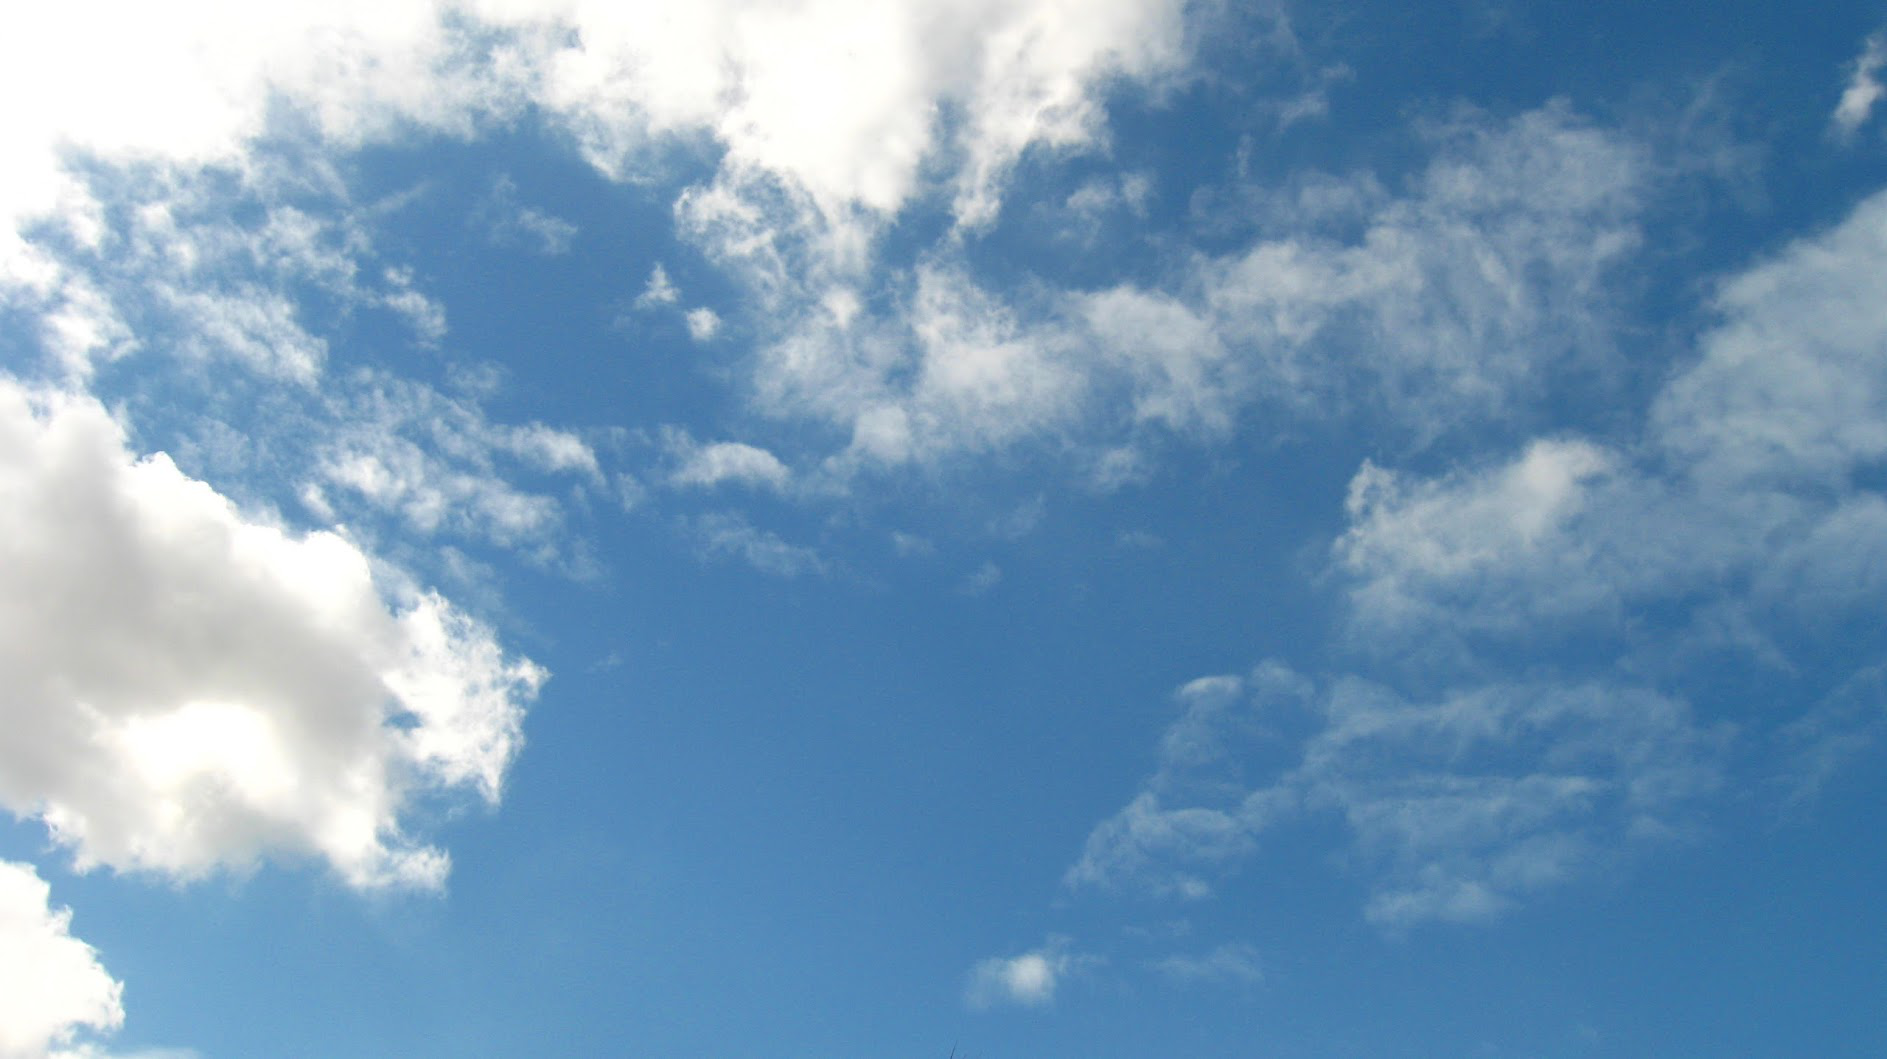

In [10]:
input_img

In [11]:
# load model
model = resnet50(pretrained=True)
if t.cuda.is_available():
    model = model.cuda()
for param in model.parameters():
    param.requires_grad = False

In [12]:
dream(model, input_np)

(1, 3, 1059, 1887)


RuntimeError: cuda runtime error (2) : out of memory at /b/wheel/pytorch-src/torch/lib/THC/generic/THCStorage.cu:66